In [1]:
from libra_toolbox.neutron_detection.activation_foils.calibration import (
    CheckSource,
    co60,
    cs137,
    mn54,
    na22,
)
from libra_toolbox.neutron_detection.activation_foils.compass import (
    Measurement,
    CheckSourceMeasurement,
)
from datetime import date

run_dir = "../../250317_BABY_1L_run3/DAQ"
uCi_to_Bq = 3.7e4

co60_checksource = CheckSource(
    co60, activity_date=date(2014, 3, 19), activity=0.872 * uCi_to_Bq
)
cs137_checksource = CheckSource(
    cs137, activity_date=date(2023, 9, 29), activity=9.38 * uCi_to_Bq
)
mn54_checksource = CheckSource(
    mn54, activity_date=date(2016, 5, 2), activity=6.27 * uCi_to_Bq
)
na22_checksource = CheckSource(
    na22, activity_date=date(2023, 9, 29), activity=9.98 * uCi_to_Bq
)

check_source_measurements = {
    "Co60_1": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250318_run2/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_2": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250319_run3/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_3": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250320_run4/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_4": {
        "directory": f"{run_dir}/Co60_1_0uCi_Jan2006_250318/UNFILTERED",
        "check_source": CheckSource(
            co60, activity_date=date(2006, 1, 1), activity=1.0 * uCi_to_Bq
        ),
    },
    "Co60_5": {
        "directory": f"{run_dir}/Co60_1_0uCi_Feb2006_250320_run1/UNFILTERED",
        "check_source": CheckSource(
            co60, activity_date=date(2006, 2, 1), activity=1.0 * uCi_to_Bq
        ),
    },
    "Cs137_1": {
        "directory": f"{run_dir}/Cs137_4_66uCi_19Mar2014_250318/UNFILTERED",
        "check_source": CheckSource(
            cs137, activity_date=date(2014, 3, 19), activity=4.66 * uCi_to_Bq
        ),
    },
    "Cs137_2": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run2/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Cs137_3": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Cs137_4": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Mn54_1": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250318/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Mn54_2": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250319_run2/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Mn54_3": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250320_run3/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Na22_2": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": na22_checksource,
    },
    "Na22_3": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run4/UNFILTERED",
        "check_source": na22_checksource,
    },
    "Na22_4": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": na22_checksource,
    },
}

background_dir = f"{run_dir}/Background_250322/UNFILTERED"

In [2]:
all_measurements = {}

for name, values in check_source_measurements.items():
    print(f"Processing {name}...")
    meas = CheckSourceMeasurement.from_directory(values["directory"], name=name)
    meas.check_source = values["check_source"]
    print(meas)
    all_measurements[name] = meas

print(f"Processing background...")
background_meas = Measurement.from_directory(
    background_dir,
    name="Background",
    info_file_optional=True,
)

Processing Co60_1...
Processing Co60_2...
Processing Co60_3...
Processing Co60_4...
Processing Co60_5...
Processing Cs137_1...
Processing Cs137_2...
Processing Cs137_3...
Processing Cs137_4...
Processing Mn54_1...
Processing Mn54_2...
Processing Mn54_3...
Processing Na22_2...
Processing Na22_3...
Processing Na22_4...
Processing background...


/home/remidm/libra-toolbox/libra_toolbox/neutron_detection/activation_foils/compass.py:209: UserWarning: run.info file not found. Assuming start and stop time are not needed.
  warnings.warn(


In [3]:
mode = "w"
for meas in all_measurements.values():
    meas.to_h5("data.h5", mode=mode, spectrum_only=True)
    mode = "a"  # Change to append mode after the first measurement

background_meas.to_h5("data.h5", mode="a", spectrum_only=False)

In [4]:
for name, values in check_source_measurements.items():
    print(f"Processing {name}...")
    meas = CheckSourceMeasurement.from_h5("data.h5", measurement_name=name)
    meas.check_source = values["check_source"]
    print(meas)
    all_measurements[name] = meas

background_meas = Measurement.from_h5("data.h5", measurement_name="Background")

Processing Co60_1...
Processing Co60_2...
Processing Co60_3...
Processing Co60_4...
Processing Co60_5...
Processing Cs137_1...
Processing Cs137_2...
Processing Cs137_3...
Processing Cs137_4...
Processing Mn54_1...
Processing Mn54_2...
Processing Mn54_3...
Processing Na22_2...
Processing Na22_3...
Processing Na22_4...


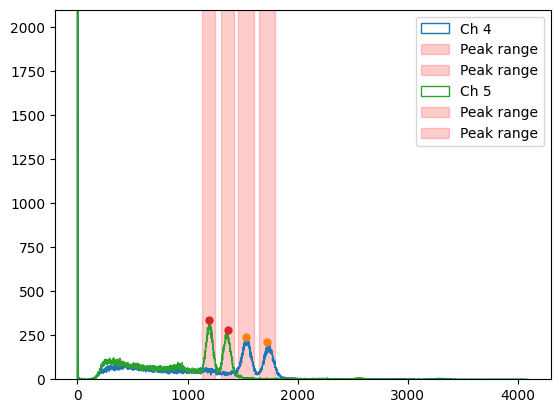

In [5]:
import matplotlib.pyplot as plt
from libra_toolbox.neutron_detection.activation_foils import compass

for detector in all_measurements["Co60_3"].detectors:
    hist, bin_edges = detector.get_energy_hist()

    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist,
        histtype="step",
        label=f"Ch {detector.channel_nb}",
    )
    peaks = all_measurements["Co60_3"].get_peaks(hist)
    # plt.plot(bin_edges[peaks], hist[peaks], '.', ms=10)

    from scipy.signal import find_peaks
    import numpy as np

    start_index = 400
    height = 0.60 * np.max(hist[start_index:])
    prominence = None
    width = [10, 150]
    distance = 30
    peaks, peak_data = find_peaks(
        hist[start_index:],
        prominence=prominence,
        height=height,
        width=width,
        distance=distance,
    )
    plt.plot(bin_edges[start_index:][peaks], peak_data["peak_heights"], ".", ms=10)

    for i, p in enumerate(peaks):
        width = peak_data["widths"][i]
        plt.axvspan(
            bin_edges[start_index:][p] - width,
            bin_edges[start_index:][p] + width,
            color="red",
            alpha=0.2,
            label="Peak range",
        )

plt.legend()
# plt.yscale("log")
plt.ylim(top=2100)
plt.show()

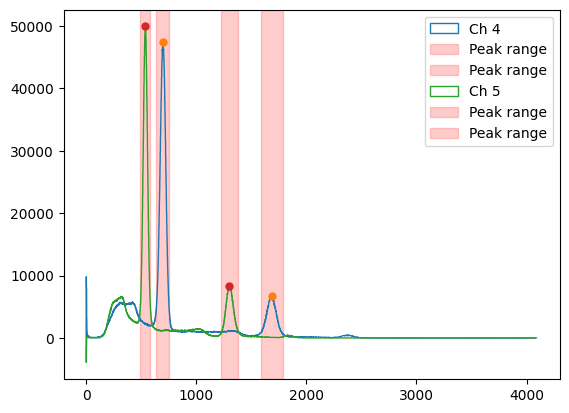

In [6]:
import matplotlib.pyplot as plt
from libra_toolbox.neutron_detection.activation_foils import compass

for detector in all_measurements["Na22_2"].detectors:
    # raw_hist, raw_bin_edges = detector.get_energy_hist(bins=None)
    # common_bins = np.intersect1d(
    #                 raw_bin_edges, background_meas.detectors[0]._bin_edges
    #             )
    # find correct bg detector
    bg_detector = [d for d in background_meas.detectors if d.channel_nb == detector.channel_nb][0]
    hist, bin_edges = detector.get_energy_hist_background_substract(bg_detector)

    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist,
        histtype="step",
        label=f"Ch {detector.channel_nb}",
    )
    peaks = all_measurements["Na22_2"].get_peaks(hist)
    # plt.plot(bin_edges[peaks], hist[peaks], '.', ms=10)

    from scipy.signal import find_peaks
    import numpy as np

    start_index = 100
    height = 0.1 * np.max(hist[start_index:])
    prominence = 0.1 * np.max(hist[start_index:])
    width = [10, 150]
    distance = 30
    peaks, peak_data = find_peaks(
        hist[start_index:],
        prominence=prominence,
        height=height,
        width=width,
        distance=distance,
    )
    plt.plot(bin_edges[start_index:][peaks], peak_data["peak_heights"], ".", ms=10)

    for i, p in enumerate(peaks):
        width = peak_data["widths"][i]
        plt.axvspan(
            bin_edges[start_index:][p] - width,
            bin_edges[start_index:][p] + width,
            color="red",
            alpha=0.2,
            label="Peak range",
        )

plt.legend()
# plt.yscale("log")
# plt.ylim(top=2100)
plt.show()

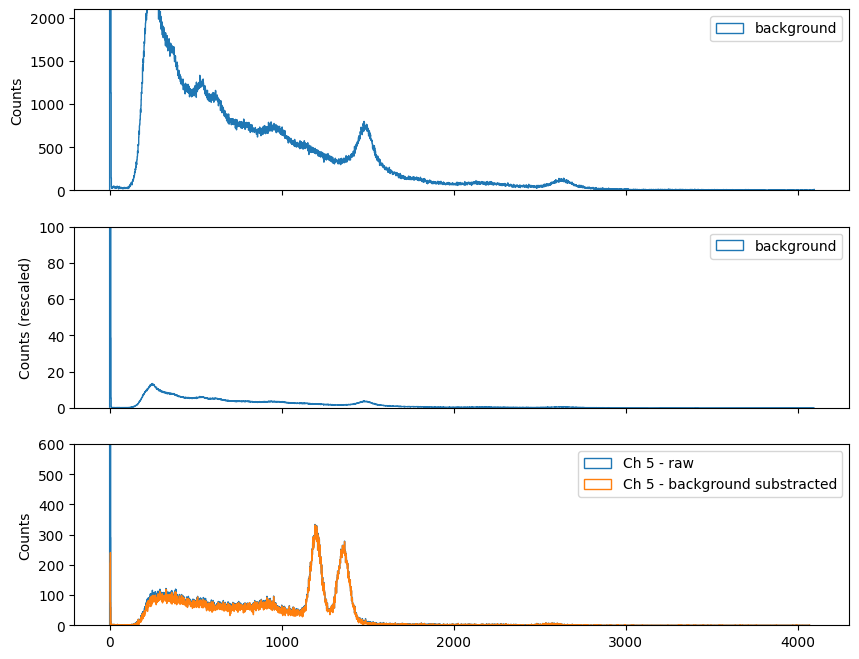

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


background_time = background_meas.detectors[1].real_count_time
bg_hist_scale = (
    hist * all_measurements["Co60_3"].detectors[1].real_count_time / background_time
)
plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=bg_hist_scale,
    histtype="step",
    label=f"background",
)
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Co60_3"].detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = (
    all_measurements["Co60_3"]
    .detectors[1]
    .get_energy_hist_background_substract(background_detector)
)

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(bottom=0, top=600)
plt.show()

/tmp/ipykernel_257427/1088032263.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


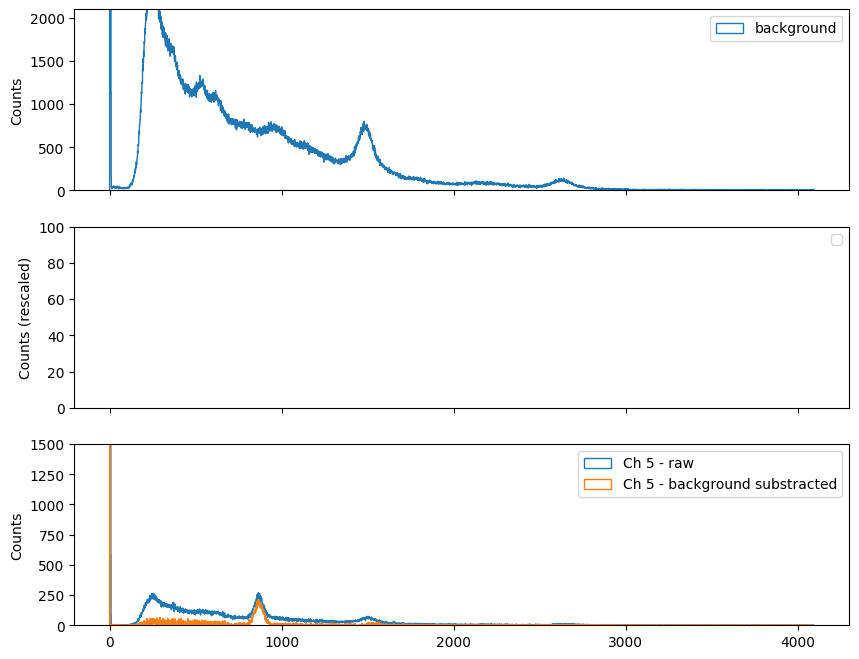

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


# background_time = background_meas.detectors[1].real_count_time
# bg_hist_scale = hist * all_measurements["Mn54_1"].detectors[1].real_count_time / background_time
# plt.hist(
#     bin_edges[:-1],
#     bins=bin_edges,
#     weights=bg_hist_scale,
#     histtype="step",
#     label=f"background",
# )
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Mn54_1"].detectors[1].get_energy_hist()

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = (
    all_measurements["Mn54_1"]
    .detectors[1]
    .get_energy_hist_background_substract(background_detector)
)

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(bottom=0, top=1500)
plt.show()

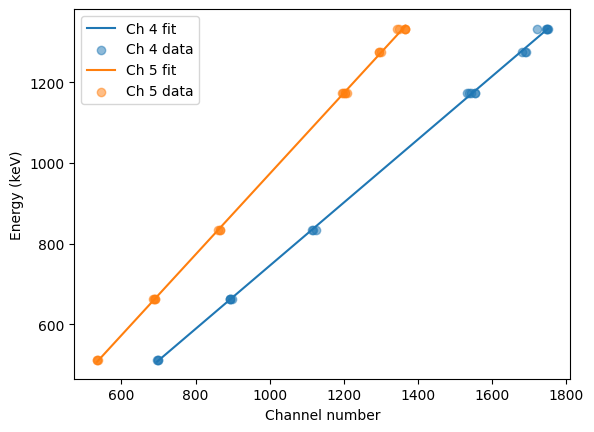

In [9]:
calibration_coeffs = {}

for channel_nb in [4, 5]:
    calibration_channels, calibration_energies = compass.get_calibration_data(
        all_measurements.values(),
        background_measurement=background_meas,
        channel_nb=channel_nb,
    )

    coeff = np.polyfit(calibration_channels, calibration_energies, 1)
    calibration_coeffs[channel_nb] = coeff

    xs = np.linspace(
        calibration_channels[0],
        calibration_channels[-1],
    )
    plt.plot(
        xs,
        np.polyval(coeff, xs),
        label=f"Ch {channel_nb} fit",
    )
    plt.scatter(
        calibration_channels,
        calibration_energies,
        label=f"Ch {channel_nb} data",
        alpha=0.5,
    )
plt.xlabel("Channel number")
plt.ylabel("Energy (keV)")
plt.legend()
plt.show()

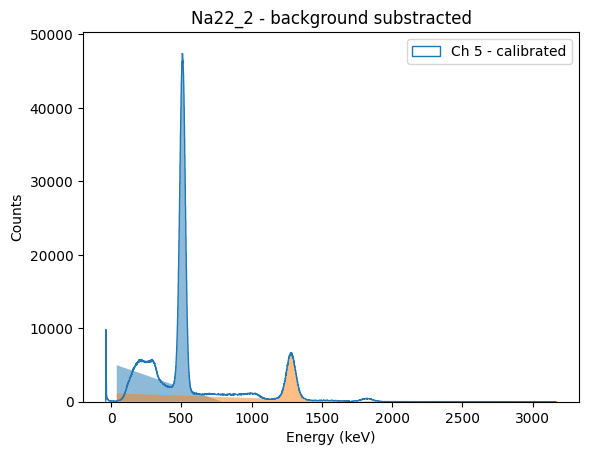

In [ ]:
ch_nb = 4
meas_name = "Na22_2"

background_detector = background_meas.detectors[0]
check_source_detector = all_measurements[meas_name].detectors[0]

assert background_detector.channel_nb == check_source_detector.channel_nb
assert (
    background_detector.channel_nb == ch_nb
), f"Channel number mismatch: {background_detector.channel_nb} != {ch_nb}"

hist, bin_edges = check_source_detector.get_energy_hist_background_substract(
    background_detector,
    bins=None,
)

calibrated_bin_edges = np.polyval(calibration_coeffs[ch_nb], bin_edges)

xvals = np.diff(calibrated_bin_edges) / 2 + calibrated_bin_edges[:-1]

for energy_peak in all_measurements[meas_name].check_source.nuclide.energy:

    parameters, covariance = compass.fit_peak_gauss(
        hist, xvals, [energy_peak], search_width=400
    )

    # plotting

    peak_start = 100
    peak_end = 3000
    plt.fill_between(
        xvals[peak_start:peak_end],
        compass.gauss(xvals[peak_start:peak_end], *parameters),
        alpha=0.5,
    )

plt.hist(
    calibrated_bin_edges[:-1],
    bins=calibrated_bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - calibrated",
)
plt.ylabel("Counts")
plt.title(f"{meas_name} - background substracted")
plt.legend()
plt.xlabel("Energy (keV)")
plt.ylim(bottom=0)
plt.show()

In [11]:
efficiency = all_measurements["Na22_2"].compute_detection_efficiency(
    background_measurement=background_meas,
    calibration_coeffs=calibration_coeffs[5],
    channel_nb=5,
    search_width=300,
)

print(f"Detection efficiency: {efficiency}")

Detection efficiency: [0.02615627 0.0133356 ]


In [12]:
channel_nb = 4
calibration_coeffs_ = calibration_coeffs[channel_nb]
for name, measurement in all_measurements.items():
    
    background_detector = background_meas.get_detector(channel_nb)
    check_source_detector = measurement.get_detector(channel_nb)

    hist, bin_edges = check_source_detector.get_energy_hist_background_substract(
        background_detector, bins=None
    )
    print(f"Processing {name}...")
    print(calibration_coeffs_, bin_edges)
    calibrated_bin_edges = np.polyval(calibration_coeffs_, bin_edges)

    nb_counts_measured = compass.get_multipeak_area(
        hist,
        calibrated_bin_edges,
        measurement.check_source.nuclide.energy,
        search_width=200,
    )

    print(f"Counts measured: {nb_counts_measured}")

    if not np.all(
            np.array(nb_counts_measured) > 0
        ):
        plt.hist(
            calibrated_bin_edges[:-1],
            bins=calibrated_bin_edges,
            weights=hist,
            histtype="step",
            label=f"Ch {check_source_detector.channel_nb} - calibrated",
        )
        for energy_peak in measurement.check_source.nuclide.energy:
            parameters, covariance = compass.fit_peak_gauss(
                hist, xvals, [energy_peak], search_width=200
            )
            search_start = np.argmin(
                np.abs((energy_peak - 200 / (2 * len([energy_peak]))) - xvals)
            )
            search_end = np.argmin(
                np.abs((energy_peak + 200 / (2 * len([energy_peak]))) - xvals)
            )
            plt.fill_between(
                xvals[search_start:search_end],
                compass.gauss(xvals[search_start:search_end], *parameters),
                alpha=0.5,
            )
        plt.show()

Processing Co60_1...
[  0.78384389 -38.37449615] [   0    1    2 ... 4064 4065 4066]
Counts measured: [np.float64(47036.03830551509), np.float64(44205.39387658654)]
Processing Co60_2...
[  0.78384389 -38.37449615] [   0    1    2 ... 4026 4027 4028]
Counts measured: [np.float64(22368.399686140438), np.float64(22576.072847491916)]
Processing Co60_3...
[  0.78384389 -38.37449615] [   0    1    2 ... 4093 4094 4095]
Counts measured: [np.float64(16154.528046739626), np.float64(13558.504178212668)]
Processing Co60_4...
[  0.78384389 -38.37449615] [   0    1    2 ... 4090 4091 4092]
Counts measured: [np.float64(29827.171495947478), np.float64(30058.52544959307)]
Processing Co60_5...
[  0.78384389 -38.37449615] [   0    1    2 ... 4038 4039 4040]
Counts measured: [np.float64(10901.980284982346), np.float64(9338.42098327135)]
Processing Cs137_1...
[  0.78384389 -38.37449615] [   0    1    2 ... 4084 4085 4086]
Counts measured: [np.float64(663460.7071836735)]
Processing Cs137_2...
[  0.78384389

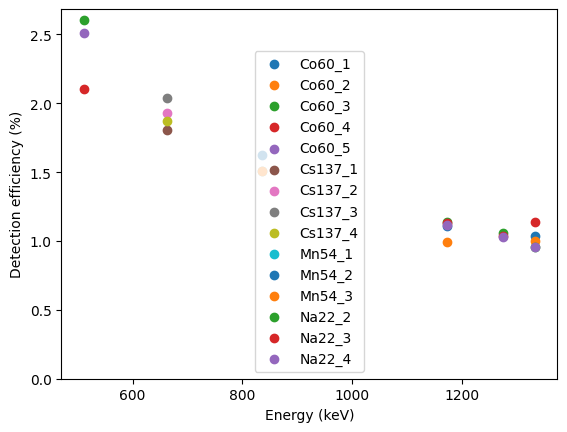

In [13]:
channel_nb = 4
for name, measurement in all_measurements.items():
    efficiency = measurement.compute_detection_efficiency(
        background_measurement=background_meas,
        calibration_coeffs=calibration_coeffs[channel_nb],
        channel_nb=channel_nb,
        search_width=200,
    )
    plt.scatter(
        measurement.check_source.nuclide.energy,
        efficiency * 100,
        label=name,
    )
plt.xlabel("Energy (keV)")
plt.ylabel("Detection efficiency (%)")
plt.legend()
plt.ylim(bottom=0)
plt.show()

In [14]:
# fit efficiency curve with polynomial

def efficiency_curve(channel_nb, measurements):
    efficiencies = []
    energies = []
    for  measurement in measurements:
        efficiency = measurement.compute_detection_efficiency(
            background_measurement=background_meas,
            calibration_coeffs=calibration_coeffs[channel_nb],
            channel_nb=channel_nb,
            search_width=200,
        )
        efficiencies.append(efficiency)
        energies.append(measurement.check_source.nuclide.energy)

    # flatten the lists
    energies = [energy for sublist in energies for energy in sublist]
    efficiencies = [efficiency for sublist in efficiencies for efficiency in sublist]
    return energies, efficiencies
energies, efficiencies = efficiency_curve(4, list(all_measurements.values()))

detection_efficiency_coeffs = np.polyfit(energies, efficiencies, 2)


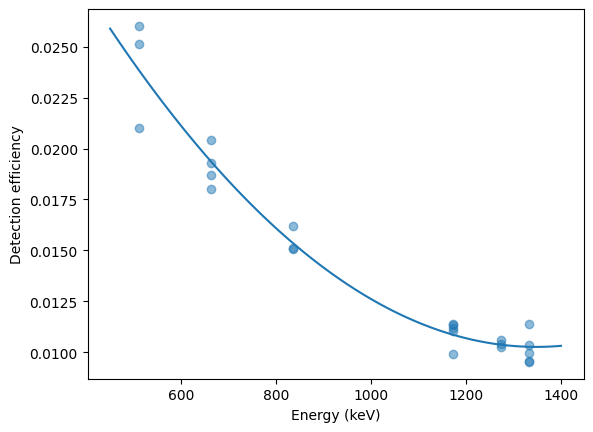

In [15]:
plt.scatter(energies, efficiencies, label="Data", alpha=0.5)
xs = np.linspace(450, 1400, 100)
plt.plot(xs, np.polyval(detection_efficiency_coeffs, xs), label="Fit")
plt.xlabel("Energy (keV)")
plt.ylabel("Detection efficiency")
plt.show()

In [16]:
from libra_toolbox.neutron_detection.activation_foils.compass import SampleMeasurement
from libra_toolbox.neutron_detection.activation_foils.calibration import (
    ActivationFoil,
    zr90_n2n, nb93_n2n,
)

nb_foil = ActivationFoil(
    reaction=nb93_n2n,
    mass=0.5359,
    name="Niobium #3",
    density=8.582,
    thickness=0.01 * 2 * 2.54,  # 0.01 inch in cm
)
nb_foil.mass_attenuation_coefficient = 0.06120 # cm^2/g at 1 MeV

zirconium1 = ActivationFoil(
    reaction=zr90_n2n,
    mass=0.9036,
    name="Zirconium #1",
    density=6.505,
    thickness=0.005 * 8 * 2.54,  # 0.01 inch in cm
)
zirconium1.mass_attenuation_coefficient = 0.08590  # cm^2/g

sample_measurements_directories = {
    "niobium_1": f"{run_dir}/Niobium_250318_1253_count1/UNFILTERED",
    "niobium_2": f"{run_dir}/Niobium_250319_1124_count2/UNFILTERED",
    "niobium_3": f"{run_dir}/Niobium_250321_0935_count3/UNFILTERED",
    "zirconium_1": f"{run_dir}/Zirconium_1L_3_240317_2312/UNFILTERED",
    "zirconium_2": f"{run_dir}/Zirconium_250318_2219_count2/UNFILTERED",
    "zirconium_3": f"{run_dir}/Zirconium_250320_1042_count3/UNFILTERED",
}

all_sample_measurements = {}

for sample, directory in sample_measurements_directories.items():
    print(f"Processing {sample}...")
    meas = SampleMeasurement.from_directory(directory, name=sample)
    print(meas)
    all_sample_measurements[sample] = meas
    if "niobium" in sample:
        meas.foil = nb_foil
    elif "zirconium" in sample:
        meas.foil = zirconium1

Processing niobium_1...
Processing niobium_2...
Processing niobium_3...
Processing zirconium_1...
Processing zirconium_2...
Processing zirconium_3...


In [17]:
for meas in all_sample_measurements.values():
    meas.to_h5("data.h5", mode="a", spectrum_only=True)

In [18]:
for sample, directory in sample_measurements_directories.items():
    print(f"Processing {sample}...")
    meas = SampleMeasurement.from_h5("data.h5", measurement_name=sample)
    print(meas)
    all_sample_measurements[sample] = meas
    if "niobium" in sample:
        meas.foil = nb_foil
    elif "zirconium" in sample:
        meas.foil = zirconium1

Processing niobium_1...
Processing niobium_2...
Processing niobium_3...
Processing zirconium_1...
Processing zirconium_2...
Processing zirconium_3...


In [19]:
from datetime import datetime
irradiations = [
    {"t_on": 0, "t_off": 12*3600}
]
time_generator_off = datetime.strptime("3/17/2025 22:10", "%m/%d/%Y %H:%M")

for ch_nb, search_width in zip([4, 5], [200, 300]):
    print(f"Processing channel {ch_nb}...")
    for sample, measurement in all_sample_measurements.items():
        emmited_gammas, err = measurement.get_gamma_emitted(
            background_measurement=background_meas,
            efficiency_coeffs=detection_efficiency_coeffs,
            calibration_coeffs=calibration_coeffs[ch_nb],
            channel_nb=ch_nb,
            search_width=search_width,
        )
        # add timezone
        time_generator_off = time_generator_off.replace(tzinfo=measurement.start_time.tzinfo)

        print(f"{sample}: {emmited_gammas} ± {err} emmited gamma rays")
        neutron_flux = measurement.get_neutron_rate(
            photon_counts=emmited_gammas,  # NOTE should account for intensity
            irradiations=irradiations,
            distance=5.08, # cm
            time_generator_off=time_generator_off,
            channel_nb=ch_nb,
        )
        print(f"{sample}: {neutron_flux[0]:.2e} neutrons/s")


Processing channel 4...
niobium_1: [421177.56667845] ± [5568.95764857] emmited gamma rays
niobium_1: 9.75e+07 neutrons/s
niobium_2: [1095916.4761057] ± [8983.17846382] emmited gamma rays
niobium_2: 1.07e+08 neutrons/s
niobium_3: [899693.81776096] ± [8139.33020337] emmited gamma rays
niobium_3: 8.99e+07 neutrons/s
zirconium_1: [1678703.37830234] ± [10951.01206566] emmited gamma rays
zirconium_1: 8.79e+07 neutrons/s
zirconium_2: [1366007.96450431] ± [9878.565664] emmited gamma rays
zirconium_2: 8.48e+07 neutrons/s
zirconium_3: [1968107.97886165] ± [11857.461856] emmited gamma rays
zirconium_3: 8.40e+07 neutrons/s
Processing channel 5...
niobium_1: [605163.6341688] ± [6675.40639871] emmited gamma rays
niobium_1: 1.22e+08 neutrons/s
niobium_2: [1407211.31183843] ± [10179.37135757] emmited gamma rays
niobium_2: 1.24e+08 neutrons/s
niobium_3: [1403706.02542878] ± [10166.68532395] emmited gamma rays
niobium_3: 1.30e+08 neutrons/s
zirconium_1: [2290779.86918969] ± [12792.60393814] emmited gamm

Processing channel 4...
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]


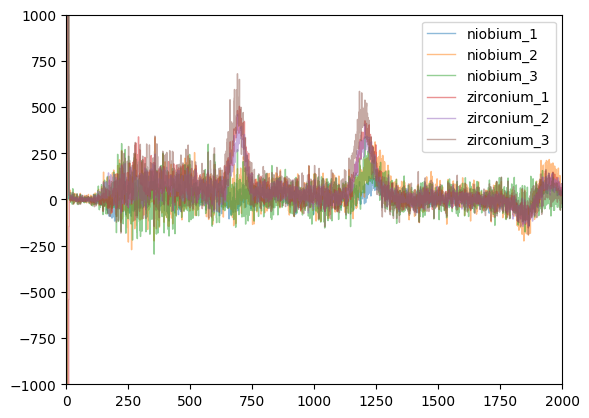

Processing channel 5...
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]


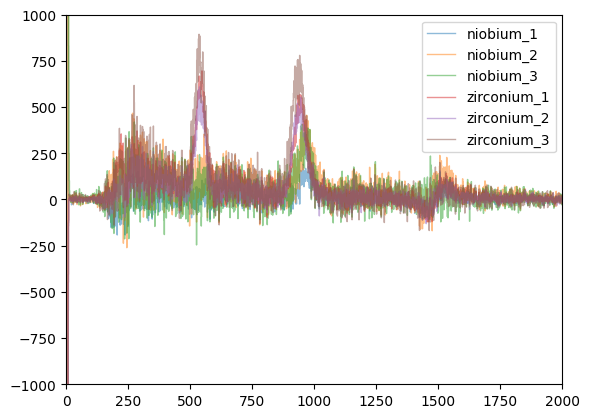

In [ ]:
for ch_nb in [4, 5]:
    print(f"Processing channel {ch_nb}...")
    for sample, measurement in all_sample_measurements.items():
        detector = measurement.get_detector(ch_nb)
        background_detector = background_meas.get_detector(ch_nb)
        hist, bin_edges = detector.get_energy_hist_background_substract(background_detector)
        # hist, bin_edges = detector.get_energy_hist()
        plt.stairs(
            hist, bin_edges, alpha=0.5, label=sample
        )

    plt.xlim(0, 2000)
    plt.ylim(-1e3, 1e3)
    # plt.yscale("log")
    plt.legend()
    plt.show()